# Lesson #01 - Bayesian concept learning

This notebook explores **Bayesian concept learning**. It is strongly based on Ref. *Machine Learning : A Probabilistic Perspective*, by Kevin P. Murphy, 2012, ISBN 978-0-262-01802-9, pp. 65-71.

It was written by Bruno Abreu: https://sites.google.com/view/brunoabreu/home

Last time this notebook was updated was on: 07-23-2020.

Please, feel free to explore it. The author appreciates being credited.

## Introduction

A good example of concept learning is how we human beings learn language when we are children. It is scientifically known that it happens by positive learning. Consider the word "dog". The way we associate the animal that we see to this word is by being told that, when we face an instance of such animal, we are seing a dog. Usually this is done by parents: "this is a dog", or "look at the dog". It is intuitive to notice that negative learning, even though can bring information, is not as effective to learn a certain concept. Being told that "this is not a dog" when we see a cat is not very helpful when we are children. 

In a more general framework, we think of input data $x$ to which is associated an output, or feature $y$. This association is potentially modeled via a set of parameters $\theta$. There are two questions that we could be interested in. The first one is: given some new data $\tilde{x}$, what is the probability that it has feature $y = c$ once we have somehow derived the parameters $\theta$? This would be encoded in the probability distribution $p(y = c | x, \theta)$. The second, which is going to be important to us here, is: what type of input $x$ gives us a certain output $y = c$? This is the inverse conditional probability which, by Bayes rule, is given by

$p(y = c | x,\theta) \propto p(x | y=c,\theta) p(y=c,\theta)$

In the case of concept learning, what we have is a certain concept $C$ and an associated probability distribution $f$ such that $f(x) = 1$ if $x \in C$ and zero otherwise. We are then interested in learning $f$ for a certain $C$ that we don't necessarily know.

## The game
Consider a simple arithmetical concept $C$, such as "prime numbers". We draw a series $D$ of randomly chosen numbers from $C$. Given $D$, we would like to classify a new number $\tilde{x}$, *viz.* does it belong to $C$ or not? More generally, what is the **posterior probability distribution** $p(\tilde{x} | D)$?  

### Examples
Suppose we do just one draw and I tell you that $D = \{16\}$. You could imagine that choices like 17, 32 or 6 -- numbers that are somewhat related to 16 -- are more likely to meet the concept $C$ that we are trying to learn, but at this point the probability distribution should be quite spread all over the possible inputs.

Conversely, if I make three more draws and tell you that $D = \{16, 8, 2, 32\}$, you could, by **induction**, say that $C$ is the set of numbers that are "powers of two", which would lead to a quite more structured distribution.

## Theory

### Relevant spaces
Let's keep going with the previous example to better define our framework. The "powers of two" concept is one of the possibilities that could represent $C$. But there might be many others! All of them live in the **hypothesis space** $H$. For instance, if $h = \text{odd numbers}$, then $h \in H$. However, a lot of possibilities that leave in $H$ may not be consistent with our observation $D$. For instance, if again $D = \{16\}$, then $h = \text{odd numbers}$ is definitely wrong! We then define the subspace of possibilities that are consistent with observations as the **version space**.

One problem now is that, for a certain observation, multiple possibilities in the version space can be consistent. For instance, for $D = \{16\}$, $h_1 = \text{powers of 2}$ and $h_2 = \text{even numbers}$ are both valid. How do we decide?

### Occam's razor
To decide, we could use a certain degree of knowledge. Consider the larger observation $D = \{16, 8, 2, 32\}$. If the true concept was $h_2$, how come we only observed numbers that are described by $h_1$? We want to avoid this **suspicious coincidence**.

To further develop this idea, we define the **extension** of a concept $h$ as all the instances of $h$ over the interval that is relevant to the problem. For simplicity, let us assume now that we are concerned about integer numbers between 1 and 100. The extension of $h_2$ would then be $\{2, 4, 6, 8, ..., 98, 100\}$.  

We will be assuming that the examples that are drawn to create $D$ are sampled uniformly at random from the extension of the true concept $C$. This is called a **strong sampling assumption**.

The probability of independently sampling $N$ items, with replacement, from a certain $h$ is 

$p(D | h) = \left[\frac{1}{\text{size}(h)}\right]^N$.

This shows exactly that what we are modeling favors the simplest, or smallest hypothesis that is consistent with the data. This is often refered to as **Occam's razor**, or the **size principle**. 

### Likelihood
To illustrate it, notice that in the case of $D = \{16\}$, we have $p(D | h_1) = 1/6$ and $p(D | h_2) = 1/50$. After the other 3 draws that give $D = \{16, 8, 2, 32\}$, we have a **likelihood** ratio of almost 5000:1 in favor of $h_1$. 


### Priors
Suppose again that $D = \{16, 8, 2, 32\}$. As far as we are concerned about the likelihood, $h_3 = \text{powers of 2 except 32}$ is even more likely than $h_1$! However, it seems *conceptually unnatural*. This can be captured by assigning a low **prior probability** to such unnatural concepts, and that is how background knowledge and subjectiveness can be brought into the problem (recall we are working with Bayesian probabilities).


### Posteriors
The *a posteriori* probability, which is the one that we get after obtaining the information brought by $D$, is, by Bayes rule, the likelihood times the prior, normalized:

$p(h | D) = \frac{p(D | h) p(h)}{\sum_{h'\in H} p(D,h')}$,

and notice that 

$p(D|h) = \mathbb{I}(D \in h) / |h|^N$,

where $\mathbb{I}(D \in h)$ is 1 if, and only if, all of the data is in the extension of hypothesis $h$ and $|h|$ is the size of $h$.

### Posterior predictive distribution
The posterior is an internal **belief state** about the world. In order to test if these beliefs are justified, we can use them to predict objectively observable quantities. The **posterior predictive distribution** in this context is then 

$ p(\tilde{x} \in C | D) = \sum_h p(y=1 | \tilde{x}, h) p(h|D) $,

which is a wighted average of the predictions of each individual hypothesis, called a **Bayes model averaging**.

# Cooking things down to code

We start by creating our **Hypothesis Space** and attributing values to their **priors**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
hypothesis_space = ['evens','odds','squares','primes', 
                    'multiples of 2', 'multiples of 3', 'multiples of 4',
                    'multiples of 5', 'multiples of 6', 'multiples of 7',
                    'multiples of 8', 'multiples of 9', 'multiples of 10',
                    'ends in 1', 'ends in 2', 'ends in 3', 'ends in 4',
                    'ends in 5', 'ends in 6', 'ends in 7', 'ends in 8',
                    'ends in 9',
                    'powers of 2', 'powers of 3', 'powers of 4', 'powers of 5',
                    'powers of 6', 'powers of 7', 'powers of 8', 'powers of 9',
                    'powers of 10',
                    'all numbers',
                    'powers of 2 + {37}', 'powers of 2 - {32}']

In [43]:
priors = [4, 4, 1, 1,
          1, 1, 1,
          1, 1, 1,
          1, 1, 1,
          1, 1, 1, 1,
          1, 1, 1, 1,
          1,
          1, 1, 1, 1,
          1, 1, 1, 1,
          1,
          1,
          0, 0]

## we want this to be a probability, so we normalize it
norm = np.sum(np.array(priors))
priors = list(priors / norm)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 <a list of 7 Text yticklabel objects>)

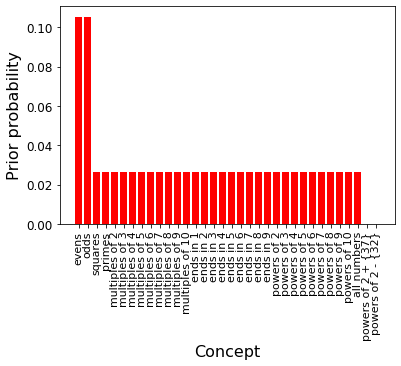

In [44]:
plt.bar(hypothesis_space,priors,color='red')
plt.xlabel('Concept',fontsize=16)
plt.ylabel('Prior probability',fontsize=16)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=12)

Before we make an observation, we need to expand each of these concepts.
This means defining an interval of interest, which in this case is from 0 to 100, and obtaining the corresponding elements of each concept.

In [45]:
interval_of_interest = np.arange(0,101,1)
extensions = []

# even numbers
extension = list(np.arange(0,101,2))
extensions.append(extension)
        
# odd numbers
extension = list(np.arange(1,100,2))
extensions.append(extension)

# squares
extension = np.arange(0,11,1)
extension = list(np.square(extension))
extensions.append(extension)

# primes
extension = []
for possiblePrime in range(2,101):
    isPrime = True
    for num in range(2, int(possiblePrime ** 0.5) + 1):
        if possiblePrime % num == 0:
            isPrime = False
            break
    if isPrime:
        extension.append(possiblePrime)
extensions.append(extension)

# multiples of 2
extension = np.arange(0,51,1)
extension = list(extension*2)
extensions.append(extension)

# multiples of 3
extension = np.arange(0,34,1)
extension = list(extension*3)
extensions.append(extension)

# multiples of 4
extension = np.arange(0,26,1)
extension = list(extension*4)
extensions.append(extension)

# multiples of 5
extension = np.arange(0,21,1)
extension = list(extension*5)
extensions.append(extension)

# multiples of 6
extension = np.arange(0,17,1)
extension = list(extension*6)
extensions.append(extension)

# multiples of 7
extension = np.arange(0,15,1)
extension = list(extension*7)
extensions.append(extension)

# multiples of 8
extension = np.arange(0,13,1)
extension = list(extension*8)
extensions.append(extension)

# multiples of 9
extension = np.arange(0,12,1)
extension = list(extension*9)
extensions.append(extension)

# multiples of 10
extension = np.arange(0,11,1)
extension = list(extension*10)
extensions.append(extension)

# ends in 1
mults_of_ten = np.arange(0,100,10)
extension = list(mults_of_ten + 1)
extensions.append(extension)

# ends in 2
extension = list(mults_of_ten + 2)
extensions.append(extension)

# ends in 3
extension = list(mults_of_ten + 3)
extensions.append(extension)

# ends in 4
extension = list(mults_of_ten + 4)
extensions.append(extension)

# ends in 5
extension = list(mults_of_ten + 5)
extensions.append(extension)

# ends in 6
extension = list(mults_of_ten + 6)
extensions.append(extension)

# ends in 7
extension = list(mults_of_ten + 7)
extensions.append(extension)

# ends in 8
extension = list(mults_of_ten + 8)
extensions.append(extension)

# ends in 9
extension = list(mults_of_ten + 9)
extensions.append(extension)

# powers of 2
extension = [1]
x = 1
for number in range(10):
    x = x*2
    if x <= 100:
        extension.append(x)
    else: 
        break
extensions.append(extension)

# powers of 3
extension = [1]
x = 1
for number in range(10):
    x = x*3
    if x <= 100:
        extension.append(x)
    else: 
        break
extensions.append(extension)

# powers of 4
extension = [1]
x = 1
for number in range(10):
    x = x*4
    if x <= 100:
        extension.append(x)
    else: 
        break
extensions.append(extension)

# powers of 5
extension = [1]
x = 1
for number in range(10):
    x = x*5
    if x <= 100:
        extension.append(x)
    else: 
        break
extensions.append(extension)

# powers of 6
extension = [1]
x = 1
for number in range(10):
    x = x*6
    if x <= 100:
        extension.append(x)
    else: 
        break
extensions.append(extension)

# powers of 7
extension = [1]
x = 1
for number in range(10):
    x = x*7
    if x <= 100:
        extension.append(x)
    else: 
        break
extensions.append(extension)

# powers of 8
extension = [1]
x = 1
for number in range(10):
    x = x*8
    if x <= 100:
        extension.append(x)
    else: 
        break
extensions.append(extension)

# powers of 9
extension = [1]
x = 1
for number in range(10):
    x = x*9
    if x <= 100:
        extension.append(x)
    else: 
        break
extensions.append(extension)

# powers of 10
extension = [1]
x = 1
for number in range(10):
    x = x*10
    if x <= 100:
        extension.append(x)
    else: 
        break
extensions.append(extension)

# all numbers
extensions.append(list(interval_of_interest))

# powers of 2 + {37}
extension = [1]
x = 1
for number in range(10):
    x = x*2
    if x <= 100:
        extension.append(x)
    else: 
        break
extension.append(37)
extensions.append(extension)

# powers of 2 - {32}
extension = [1]
x = 1
for number in range(10):
    x = x*2
    if x <= 100:
        extension.append(x)
    else: 
        break
extension.remove(32)
extensions.append(extension)

Now suppose that we have made the observation and came out with:

$D = \{16\}$.

We then calculate the likelihood of each of the concepts in the hypothesis space with the formula:

$p(D | h) = \left[\frac{1}{\text{size}(h)}\right]^N$.


To calculate the likelihoods, we need the sizes of these sets.

In [46]:
observation = 16

is_in_concept = []      ## this basically creates that I function

for extension_of_concept in extensions:
    if (observation in extension_of_concept):
        is_in_concept.append(True)
    else:
        is_in_concept.append(False)

In [47]:
sizes = []
for extension_of_concept in extensions:
    size = len(extension_of_concept)
    sizes.append(size)

Now finally calculate the **likelihood**:

In [48]:
likelihood = list(np.array(is_in_concept) / np.array(sizes))

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

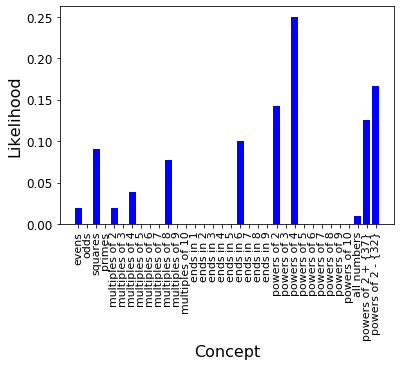

In [49]:
plt.bar(hypothesis_space,likelihood,color='blue')
plt.xlabel('Concept',fontsize=16)
plt.ylabel('Likelihood',fontsize=16)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=12)

Now we can calculate the **posteriors**, which is simply the product of each likelihood and the corresponding prior, normalized.

In [50]:
posterior = np.multiply(np.array(likelihood),np.array(priors))
norm = np.sum(np.array(posterior))
posterior = np.divide(posterior, norm)
posterior = list(posterior)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 <a list of 8 Text yticklabel objects>)

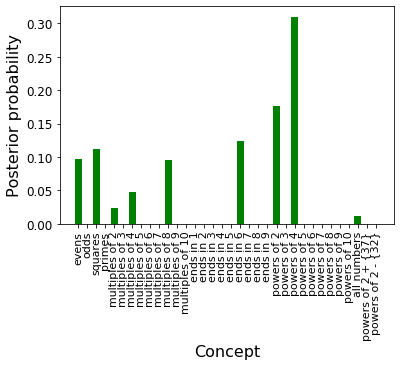

In [51]:
plt.bar(hypothesis_space,posterior,color='green')
plt.xlabel('Concept',fontsize=16)
plt.ylabel('Posterior probability',fontsize=16)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=12)

There are a couple of things to notice here. First, we see that the concept that has the highest probability of being the right one after we make the observation $D = \{16\}$ is "powers of 4". This is a consequence of having substantial prior and likelihood at the same time. However, there other concepts, such as "powers of 2", that also have a good chance of being the right one. On the other hand, concepts such as "powers of 2 - {32}", which have large likelihood, are eliminated by our insight that this is likely not to be a very useful concept, which was enclosed in a zero prior. Now... this is all with just a single observation! What would happen if we make more observations, which corresponds to adding more elements to $D$?

Let's say we have now $D = \{16, 8, 2, 64\}$, and let's just run everything again.
Before that, let's write a short function that will tell us whether a list is a sublist of another list:

In [52]:
def is_sublist(list1,list2):
    return set(list1) <= set(list2)

In [53]:
observation = [16, 8, 2, 64]

is_in_concept = []      ## this basically creates that I function

for extension_of_concept in extensions:
        is_in_concept.append(is_sublist(observation,extension_of_concept))

In [54]:
likelihood = list(np.array(is_in_concept) / (np.power(np.array(sizes),len(observation))))

In [55]:
posterior = np.multiply(np.array(likelihood),np.array(priors))
norm = np.sum(np.array(posterior))
posterior = np.divide(posterior, norm)
posterior = list(posterior)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12]),
 <a list of 7 Text yticklabel objects>)

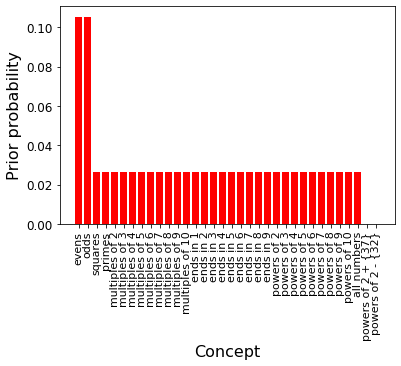

In [56]:
plt.bar(hypothesis_space,priors,color='red')
plt.xlabel('Concept',fontsize=16)
plt.ylabel('Prior probability',fontsize=16)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=12)

(array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
        0.0008, 0.0009]), <a list of 10 Text yticklabel objects>)

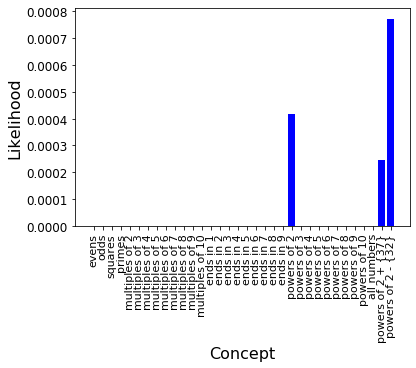

In [57]:
plt.bar(hypothesis_space,likelihood,color='blue')
plt.xlabel('Concept',fontsize=16)
plt.ylabel('Likelihood',fontsize=16)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=12)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

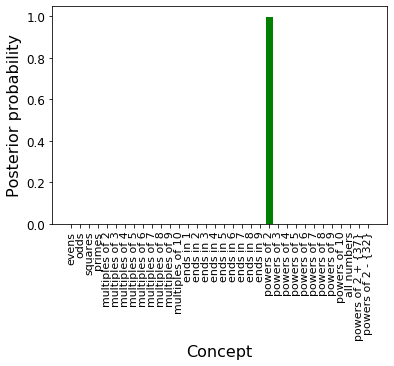

In [58]:
plt.bar(hypothesis_space,posterior,color='green')
plt.xlabel('Concept',fontsize=16)
plt.ylabel('Posterior probability',fontsize=16)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=12)

## Concluding remarks on learning


We notice that the likelihoods are much more concentraded on concepts that relate to "powers of 2", which is expected from our observations $D = \{16, 8, 2, 64\}$. The *learner* then has a **eureka** moment, and finally figures out the correct concept: "powers of 2", which is demonstrated by a strong peaked posterior probability. Here it is important to notice the importance of having low priors to unnatural concepts: "powers of 2 - {32}" would be the concept learned if it wasn't for its low prior.
In general, when there is enough data, or $D$ is large enough, we have

$ p(h | D) \to \delta_{\hat{h}^{MAP}}(h)$,

where $\hat{h}^{MAP} = argmax_h p(h|D)$ is the posterior mode and $\delta$ is the Dirac measure. MAP stands for "maximum posterior". This estimate can also be written as:

$ \hat{h}^{MAP} = argmax_h p(D|h) p(h) = argmax_h[\log p(D|h) + \log p(h)]$.

Now, recall that the likelihood term depends exponentially on the size of $D$, and the prior stays constant. Therefore, as we get more and more data, the MAP estimate converges to the **maximum likelihood estimate**, or MLE:

$ \hat{h}^{MLE} = argmax_h p(D|h) = argmax_h \log p(D|h)$.

In other words, when there is enough data, it overwhelms the prior.

If the true hypothesis is in the hypothesis space, these estimates will converge to it. It is said that Bayesian inference is a consistent estimator. 

## Predictive distributions

Let's get back to the case where we have $D = \{16\}$. We are going to use our posterior distribution to perform a Bayes model averaging that will tell us how likely it will be for the numbers in our interval of interest (0 to 100) to be observed in subsequent draws.

In [59]:
observation = 16

is_in_concept = []      ## this basically creates that I function

for extension_of_concept in extensions:
    if (observation in extension_of_concept):
        is_in_concept.append(True)
    else:
        is_in_concept.append(False)

Recall that the **version space** consists of the hypotheses that are consisted with this observation:

In [75]:
version_space = []
valid_extensions = []
valid_priors = []
valid_sizes = []
for index,logic in enumerate(is_in_concept):
    if(logic):
        version_space.append(hypothesis_space[index])
        valid_extensions.append(extensions[index])
        valid_priors.append(priors[index])
        valid_sizes.append(len(extensions[index]))

In [79]:
likelihood = list(np.divide(1,np.array(valid_sizes)))

In [81]:
posterior = np.multiply(np.array(likelihood),np.array(valid_priors))
norm = np.sum(np.array(posterior))
posterior = np.divide(posterior, norm)
posterior = list(posterior)

In [83]:
predictive_distribution = []
for number in interval_of_interest:
    bayes_avg = 0.0
    for index,extension in enumerate(valid_extensions):
        if number in extension:
            bayes_avg += posterior[index]
    predictive_distribution.append(bayes_avg)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

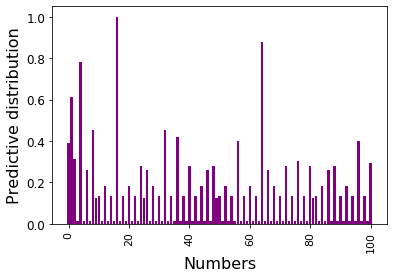

In [86]:
plt.bar(interval_of_interest,predictive_distribution,color='purple')
plt.xlabel('Numbers',fontsize=16)
plt.ylabel('Predictive distribution',fontsize=16)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=12)

It is wonderful to see here that, indeed, the numbers 2, 4 and 64 are indeed strongly predicted by our model.


I hope you have enjoyed this notebook. In the next lesson, we will discuss an abstraction of what we have seen here: the **beta-binomial model**.